In [1]:
import pandas as pd

# Cargar los datos
data = pd.read_csv('datasets/ny-housing-market/NY-House-Dataset.csv')

# Muestra de los datos
data.head()


,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856


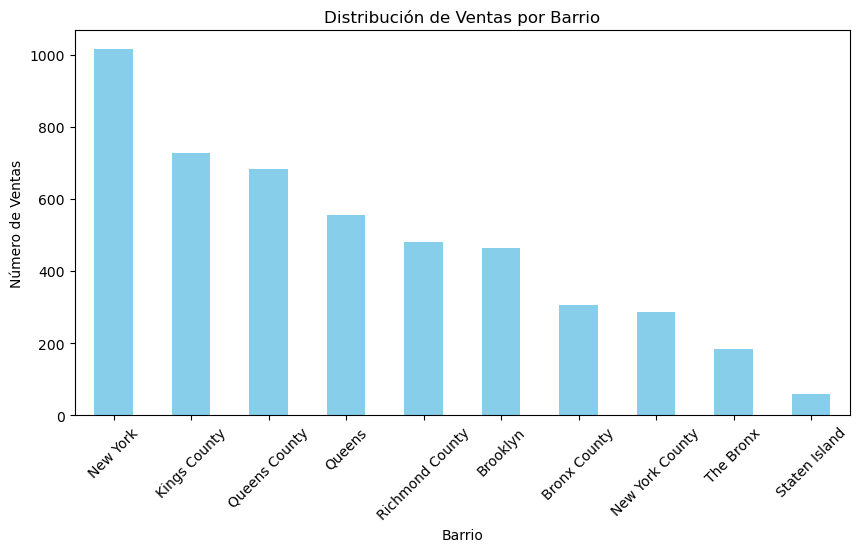

In [2]:
import matplotlib.pyplot as plt

# Contar las ventas por barrio
sales_by_neighborhood = data['SUBLOCALITY'].value_counts().head(10)  # Tomar los 10 barrios con más ventas

plt.figure(figsize=(10, 5))
sales_by_neighborhood.plot(kind='bar', color='skyblue')
plt.xlabel('Barrio')
plt.ylabel('Número de Ventas')
plt.title('Distribución de Ventas por Barrio')
plt.xticks(rotation=45)
plt.show()


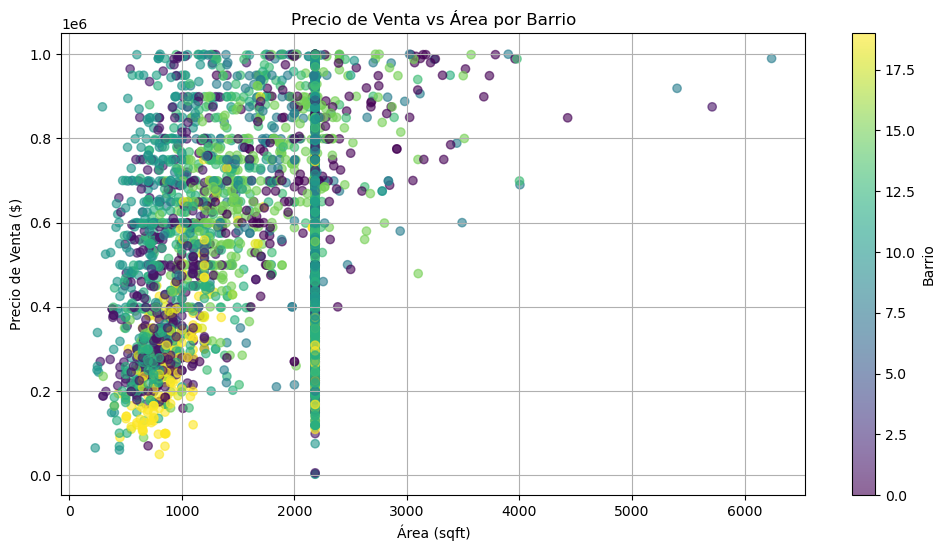

In [3]:
# casas de menos de 1 millón de dólares
data = data[data['PRICE'] < 1000000]

plt.figure(figsize=(12, 6))

# Crear un scatter plot
scatter = plt.scatter(data['PROPERTYSQFT'], data['PRICE'], c=data['SUBLOCALITY'].astype('category').cat.codes, cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='Barrio')
plt.xlabel('Área (sqft)')
plt.ylabel('Precio de Venta ($)')
plt.title('Precio de Venta vs Área por Barrio')
plt.grid(True)
plt.show()


Matplotlib es una libreria basica que tiene los elementos necesarios para graficar la mayoria de las visualizaciones que se necesitan.

/var/folders/s9/pkq_ftrs45d7vxwnrztcln6r0000gn/T/ipykernel_93767/3919817045.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='SUBLOCALITY', order=data['SUBLOCALITY'].value_counts().iloc[:10].index, palette='viridis')


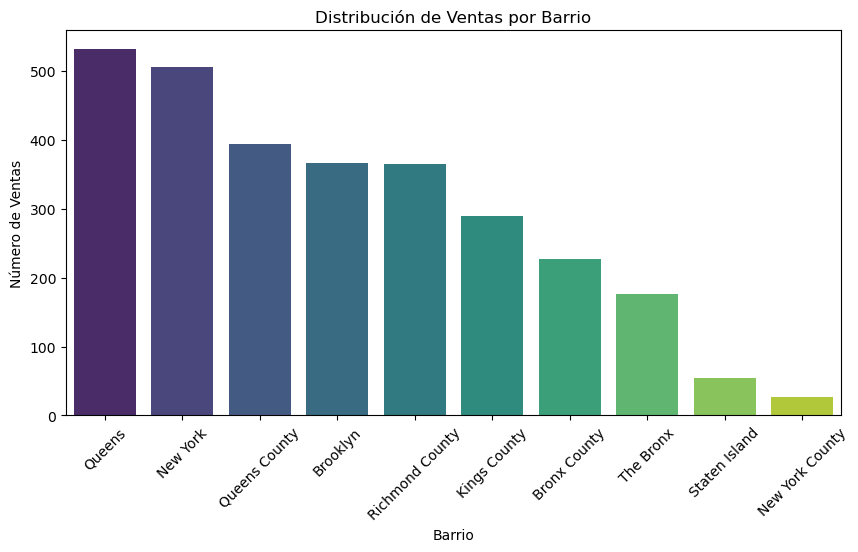

In [4]:
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.countplot(data=data, x='SUBLOCALITY', order=data['SUBLOCALITY'].value_counts().iloc[:10].index, palette='viridis')
plt.xlabel('Barrio')
plt.ylabel('Número de Ventas')
plt.title('Distribución de Ventas por Barrio')
plt.xticks(rotation=45)
plt.show()


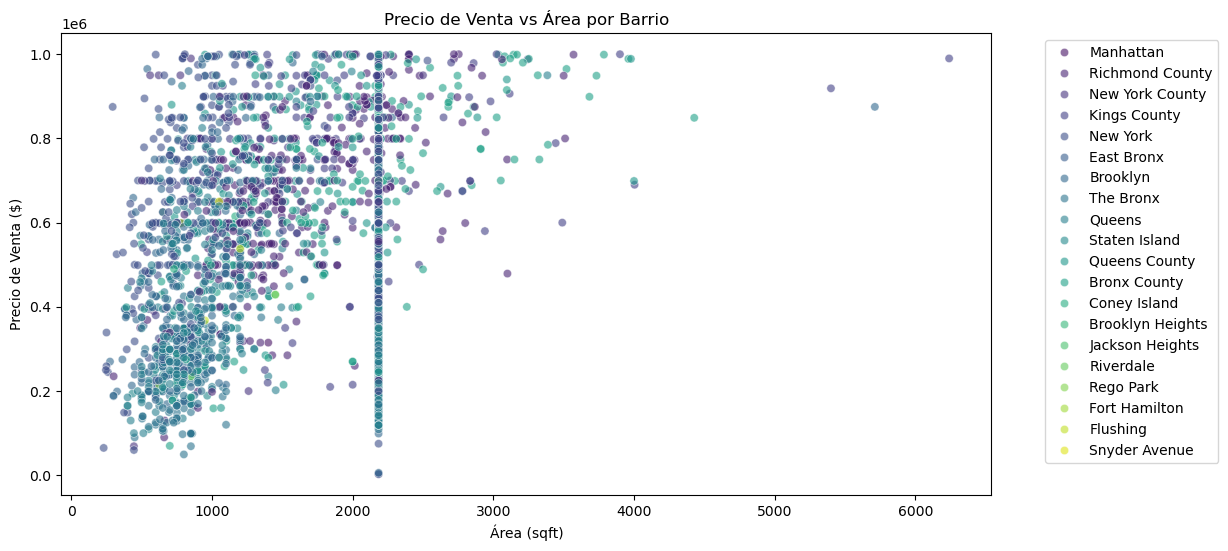

In [5]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=data, x='PROPERTYSQFT', y='PRICE', hue='SUBLOCALITY', palette='viridis', alpha=0.6)
plt.xlabel('Área (sqft)')
plt.ylabel('Precio de Venta ($)')
plt.title('Precio de Venta vs Área por Barrio')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()


Seaborn tiene mas control sobre el estilo de grafico, y tiene mas versatilidad a la hora de mostrar graficos complegos integrando varias variables. 

In [6]:
import plotly.express as px

# Contar las ventas por barrio
sales_by_neighborhood = data['SUBLOCALITY'].value_counts().head(10).reset_index()
sales_by_neighborhood.columns = ['SUBLOCALITY', 'sales']

fig = px.bar(sales_by_neighborhood, x='SUBLOCALITY', y='sales', title='Distribución de Ventas por Barrio', labels={'SUBLOCALITY': 'Barrio', 'sales': 'Número de Ventas'})
fig.show()


In [7]:
fig = px.scatter(data, x='PROPERTYSQFT', y='PRICE', color='SUBLOCALITY', title='Precio de Venta vs Área por Barrio', labels={'gross_sqft': 'Área (sqft)', 'PRICE': 'Precio de Venta ($)'}, opacity=0.6)
fig.show()


Plotly nos permite mucho mas control sobre el mismo grafico, pudiendo hacer zoom y chequear los datos de casos puntuales, cosa que no es posible con seaborn o matplotlib. Por supuesto que con el costo de un mayor uso de los recursos. 

## Conclusion

Todas las librerias tienen sus usos y limitaciones. Por tener ese grado de control, Plotly tambien conlleva un grado de complejidad mayor, y sera apropiada para ciertos casos. Es util conocer lo basico de las distintas librerias para saber en que caso conviene usar una u otra.